In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest, chi2
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler, Normalizer

In [4]:
data = pd.read_csv('processed_datascience.csv.bz2')
data['wordcount'] = data['title'].str.split().apply(len)
data['charcount'] = data.title.str.len()
data['vowels'] = data.title.str.findall(r'[aeiou]').apply(len)
data['consonants'] = data.title.str.findall(r'[^aeiou]').apply(len)
data['target'] = data.ups > 20

In [5]:
blobs = [TextBlob(sentence) for sentence in data.title]
data['polarity'] = [blob.sentiment.polarity for blob in blobs]
data['subjectivity'] = [blob.sentiment.subjectivity for blob in blobs]
data['noun_phrases'] = [len(blob.noun_phrases) for blob in blobs]

In [6]:
X = data[['wordcount', 'charcount', 'vowels', 'consonants',
          'polarity', 'subjectivity', 'noun_phrases']]
y = data.target
X.shape

(8856, 7)

In [10]:
#X_new = SelectKBest(chi2, k=2).fit_transform(X,y)
#X_new.shape
#X_new

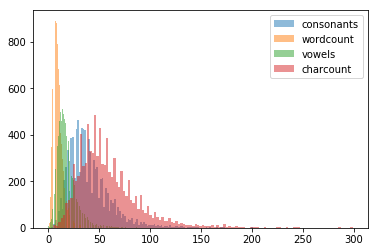

In [17]:
bins = 125
plt.hist(data.consonants, bins=bins, alpha=0.5, label='consonants')
plt.hist(data.wordcount, bins=bins, alpha=0.5, label='wordcount')
plt.hist(data.vowels, bins=bins, label='vowels', alpha=0.5)
plt.hist(data.charcount, bins=bins, label='charcount', alpha=0.5)
plt.legend(loc='upper right')
plt.show()